# Reading from Excel files

To read form Excel files in Python we use a specialised library called `pandas`. 

In [3]:
! pip install pandas


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

In [5]:
! pip install openpyxl


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# read in a DataFrame from an Excel file
df = pd.read_excel("../data/dummy-data.xlsx",usecols=["time", "measurement"])

df

,time,measurement
0,0.1,3.0
1,0.2,4.0
2,0.3,5.0
3,0.4,6.0
4,0.5,7.0
5,0.6,8.0
6,0.7,9.0
7,0.8,4.0
8,0.9,8.0
9,1.0,8.5


<Axes: title={'center': 'Measurement over time'}, xlabel='time'>

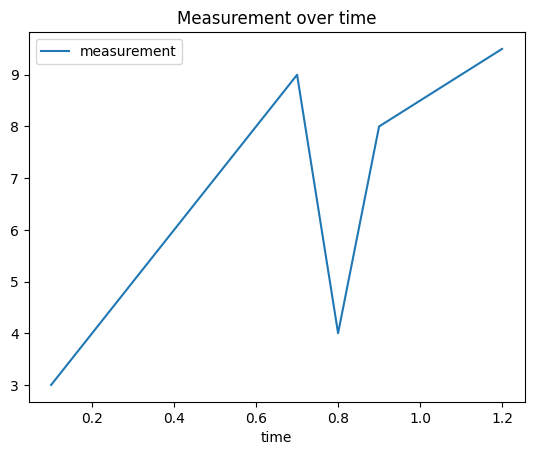

In [7]:
df.plot(x="time", y="measurement", kind="line", title="Measurement over time")

Suppose we wanted some statistics, we can do it immediately

In [8]:
df['measurement'].median()

np.float64(7.5)

In [9]:
df['measurement'].mean()

np.float64(6.75)

In [10]:
df["measurement"].describe()

count    12.000000
mean      6.750000
std       2.271363
min       3.000000
25%       4.750000
50%       7.500000
75%       8.625000
max       9.500000
Name: measurement, dtype: float64

## On brackets

- Square brackets `[]` are used to access elements in lists, dictionaries, and DataFrames.
- Parentheses `()` are used to call functions and methods.

In [11]:
mydict= {"time": [0,1,2,3,4,5],
         "measurement": [10,12,9,11,13,12] }

In [12]:
mydict["measurement"]

[10, 12, 9, 11, 13, 12]

In [13]:
def myfunc(x):
    return x*2

myfunc(5)

10

In [ ]:
## My own practice using previous data or cartilage injury. ##

In [25]:
df = pd.read_excel("../data/4.5dpf_WT.xlsx")
print(df)

  4.5dpf larvae  Number of neuronal branches
0            C1                           31
1            C2                           31
2            C3                           30
3            C4                           27
4            C5                           24
5            T1                           39
6            T2                           37
7            T3                           35
8            T4                           30


In [28]:
df["Group"] = df["4.5dpf larvae"].str[0].map({"C": "Control", "T": "Treated"})
print(df)

  4.5dpf larvae  Number of neuronal branches    Group
0            C1                           31  Control
1            C2                           31  Control
2            C3                           30  Control
3            C4                           27  Control
4            C5                           24  Control
5            T1                           39  Treated
6            T2                           37  Treated
7            T3                           35  Treated
8            T4                           30  Treated


In [ ]:
summary = df.groupby("Group")["Value"].agg(["mean", "std"])
plt.bar(summary.index, summary["mean"], yerr=summary["std"], capsize=5, color=["skyblue", "salmon"])
plt.title("Control vs Treated")
plt.ylabel("Value")
plt.show()

<Axes: title={'center': 'Control vs. Injury'}, xlabel='Group'>

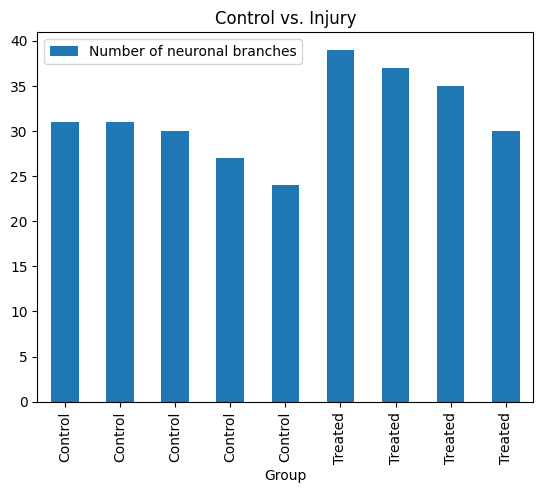

In [29]:
df.plot(x="Group", y="Number of neuronal branches", kind="bar", title="Control vs. Injury")